In [12]:
import sqlite3
import pandas as pd

# Connect to the database
db_path = 'C:/Users/DELL/Downloads/insurance_normalized.db'
conn = sqlite3.connect(db_path)

# Define the SQL query
query = """
SELECT 
    p.PersonID,
    p.age,
    p.sex,
    p.smoker,
    p.children,
    r.region,
    i.bmi,
    i.charges
FROM 
    Person p
JOIN 
    InsuranceDetails i ON p.PersonID = i.PersonID
JOIN 
    Region r ON i.RegionID = r.RegionID;
"""

# Execute the query and load into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the DataFrame
df.head()


PersonID  age     sex smoker  children     region     bmi      charges
0         1   19  female    yes         0  southwest  27.900  16884.92400
1         2   18    male     no         1  southeast  33.770   1725.55230
2         3   28    male     no         3  southeast  33.000   4449.46200
3         4   33    male     no         0  northwest  22.705  21984.47061
4         5   32    male     no         0  northwest  28.880   3866.85520

In [14]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split

# Connect to the database
db_path = 'C:/Users/DELL/Downloads/insurance_normalized.db'
conn = sqlite3.connect(db_path)

# Define the SQL query
query = """
SELECT 
    p.PersonID,
    p.age,
    p.sex,
    p.smoker,
    p.children,
    r.region,
    i.bmi,
    i.charges
FROM 
    Person p
JOIN 
    InsuranceDetails i ON p.PersonID = i.PersonID
JOIN 
    Region r ON i.RegionID = r.RegionID;
"""

# Execute the query and load into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the DataFrame
df.head()

# Explore the data: Check distributions of key categorical attributes
attribute_distributions = {
    "sex": df["sex"].value_counts(normalize=True),
    "smoker": df["smoker"].value_counts(normalize=True),
    "region": df["region"].value_counts(normalize=True),
    "children": df["children"].value_counts(normalize=True),
}

# Display distributions for analysis
print("Attribute Distributions:")
for attribute, distribution in attribute_distributions.items():
    print(f"\n{attribute}:\n{distribution}")

# Perform train/test split with stratification based on 'smoker'
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['smoker'], random_state=42)

# Output the shapes of the train and test datasets
print("\nTrain/Test Split:")
print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")

# Save train and test datasets as CSV (optional)
train_df.to_csv('train_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)
print("\nTrain and test datasets have been saved as 'train_dataset.csv' and 'test_dataset.csv'.")


Attribute Distributions:

sex:
sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64

smoker:
smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64

region:
region
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: proportion, dtype: float64

children:
children
0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: proportion, dtype: float64

Train/Test Split:
Training set shape: (1070, 8)
Testing set shape: (268, 8)

Train and test datasets have been saved as 'train_dataset.csv' and 'test_dataset.csv'.


In [33]:
pip install ydata_profiling


   ---------------------------------------- 0.0/390.9 kB ? eta -:--:--
   ----------- ---------------------------- 112.6/390.9 kB 3.3 MB/s eta 0:00:01
   ------------------------ --------------- 235.5/390.9 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------  389.1/390.9 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 390.9/390.9 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/104.8 kB ? eta -:--:--
   ---------------------------------------- 104.8/104.8 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ------------ --------------------------- 92.2/301.2 kB 2.6 MB/s eta 0:00:01
   -------------------- ------------------- 153.6/301.2 kB 3.1 MB/s eta 0:00:01
   ----------------------------------- ---- 266.2/301.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: visions
    Found existing installation: vis

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [40]:
import sqlite3
import pandas as pd
from ydata_profiling import ProfileReport

# Connect to the SQLite database
db_path = "C:/Users/DELL/Downloads/insurance_normalized.db"
conn = sqlite3.connect(db_path)

# Query the database to fetch data into a DataFrame
query = """
SELECT 
    p.PersonID,
    p.age,
    p.sex,
    p.smoker,
    p.children,
    r.region,
    i.bmi,
    i.charges
FROM 
    Person p
JOIN 
    InsuranceDetails i ON p.PersonID = i.PersonID
JOIN 
    Region r ON i.RegionID = r.RegionID;
"""
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Generate a profile report
profile = ProfileReport(df, title="Insurance Data Profile Report", explorative=True)
profile.to_file("insurance_data_profile_report.html")

# Calculate and display the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Save correlation matrix
correlation_matrix.to_csv("correlation_matrix.csv")

print("Profile report saved as 'insurance_data_profile_report.html'. Correlation matrix saved as 'correlation_matrix.csv'.")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Correlation Matrix:
          PersonID       age  children       bmi   charges
PersonID  1.000000 -0.031467  0.025221 -0.036169 -0.003373
age      -0.031467  1.000000  0.042469  0.109272  0.299008
children  0.025221  0.042469  1.000000  0.012759  0.067998
bmi      -0.036169  0.109272  0.012759  1.000000  0.198341
charges  -0.003373  0.299008  0.067998  0.198341  1.000000
Profile report saved as 'insurance_data_profile_report.html'. Correlation matrix saved as 'correlation_matrix.csv'.


In [66]:
pip install dagshub mlflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import dagshub
import os

# Initialize DagsHub connection
dagshub.init(repo_owner='SaiRishi9', repo_name='my-first-repo', mlflow=True)

# Set MLflow tracking URI and credentials for DagsHub
os.environ["MLFLOW_TRACKING_URI"] = "https://dagshub.com/SaiRishi9/my-first-repo.mlflow"
os.environ["MLFLOW_TRACKING_USERNAME"] = "SaiRishi9"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "04d7d6dc6aecf6ef6daebf98528e9e3ef8afaae7"

# Manually create the experiment
try:
    mlflow.create_experiment("Logistic Regression Experiment")
except Exception:
    pass  # Ignore if the experiment already exists

mlflow.set_experiment("Experiment 1:Logistic Regression Experiment")

# Load the dataset
db_path = "C:/Users/DELL/Downloads/insurance_normalized.db"
conn = sqlite3.connect(db_path)

query = """
SELECT 
    p.PersonID,
    p.age,
    p.sex,
    p.smoker,
    p.children,
    r.region,
    i.bmi,
    i.charges
FROM 
    Person p
JOIN 
    InsuranceDetails i ON p.PersonID = i.PersonID
JOIN 
    Region r ON i.RegionID = r.RegionID;
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Separate features and target
X = df.drop(columns=["smoker"])  # Feature set
y = df["smoker"].map({"yes": 1, "no": 0})  # Target variable (binary encoding)

# Ensure all numeric columns are float64
numeric_features = ["age", "bmi", "charges", "children"]
X = X.astype({col: 'float64' for col in numeric_features})

# Validate and handle missing values before splitting
print("Missing values before preprocessing:", X.isnull().sum())
X = X.fillna(method="ffill").fillna(method="bfill")
print("Missing values after global fillna:", X.isnull().sum())

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Validate missing values in training and test sets
print("Missing values in X_train:", X_train.isnull().sum())
print("Missing values in X_test:", X_test.isnull().sum())
if X_train.isnull().any().any() or X_test.isnull().any().any():
    raise ValueError("Missing values detected in the training or test set after splitting.")

# Preprocessing pipeline
categorical_features = ["sex", "region"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),  # Impute missing values
    ("clipper", FunctionTransformer(lambda x: np.clip(x, 1e-10, None))),  # Clip values to avoid invalid logs
    ("scaler", StandardScaler()),                # Standard scaling
    ("log", FunctionTransformer(np.log1p, validate=True))  # Log transformation
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Impute missing values with the mode
    ("onehot", OneHotEncoder(drop="first"))               # One-hot encoding
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("fallback_imputer", FunctionTransformer(lambda x: np.nan_to_num(x))),  # Replace remaining NaNs
    ("classifier", LogisticRegression(max_iter=500, random_state=42))  # Logistic Regression
])

# Dry-run the pipeline with a small subset of data
try:
    X_train_sample = X_train.iloc[:10]
    pipeline.fit(X_train_sample, y_train.iloc[:10])
    print("Pipeline executed successfully with sample data.")
except Exception as e:
    print(f"Pipeline failed with sample data: {e}")

# Start MLflow logging
mlflow.autolog()

with mlflow.start_run():
    # Cross-validation (3 and 10 folds)
    try:
        cv_results_3 = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="f1", n_jobs=-1, error_score="raise")
        cv_results_10 = cross_val_score(pipeline, X_train, y_train, cv=10, scoring="f1", n_jobs=-1, error_score="raise")

        # Log preprocessing and model details
        mlflow.log_param("preprocessor", "StandardScaler + LogTransformation + OneHotEncoder")
        mlflow.log_param("model", "LogisticRegression")
        
        # Log cross-validation results
        mlflow.log_metric("CV3_Mean_F1", np.mean(cv_results_3))
        mlflow.log_metric("CV3_Std_F1", np.std(cv_results_3))
        mlflow.log_metric("CV10_Mean_F1", np.mean(cv_results_10))
        mlflow.log_metric("CV10_Std_F1", np.std(cv_results_10))
        
        # Fit model and log training data results
        pipeline.fit(X_train, y_train)
        y_train_pred = pipeline.predict(X_train)
        
        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
        mlflow.log_metric("Train_F1_Score", f1_score(y_train, y_train_pred))
        mlflow.log_metric("True_Positive", tp)
        mlflow.log_metric("True_Negative", tn)
        mlflow.log_metric("False_Positive", fp)
        mlflow.log_metric("False_Negative", fn)
        
        # Hyperparameter tuning using GridSearchCV
        param_grid = {
            "classifier__C": [0.01, 0.1, 1, 10, 100],
            "classifier__solver": ["lbfgs", "liblinear"]
        }
        grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="f1", n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Log best parameters and best score
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric("Best_F1_Score", grid_search.best_score_)
        
        # Save the model with an example input
        mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model", input_example=X_train.iloc[:1])
    except ValueError as e:
        print(f"Error during cross-validation or training: {e}")

print("Experiment 1 logged in MLflow and DagsHub!")


Initialized MLflow to track repo "SaiRishi9/my-first-repo"

Repository SaiRishi9/my-first-repo initialized!

2024/12/19 18:50:35 INFO mlflow.tracking.fluent: Experiment with name 'Experiment 1:Logistic Regression Experiment' does not exist. Creating a new experiment.
C:\Users\DELL\AppData\Local\Temp\ipykernel_3996\485772487.py:65: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill").fillna(method="bfill")
2024/12/19 18:50:35 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1d36788a7c604bb28147fb7c03b2e416', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Missing values before preprocessing: PersonID    0
age         0
sex         0
children    0
region      0
bmi         0
charges     0
dtype: int64
Missing values after global fillna: PersonID    0
age         0
sex         0
children    0
region      0
bmi         0
charges     0
dtype: int64
Missing values in X_train: PersonID    0
age         0
sex         0
children    0
region      0
bmi         0
charges     0
dtype: int64
Missing values in X_test: PersonID    0
age         0
sex         0
children    0
region      0
bmi         0
charges     0
dtype: int64


2024/12/19 18:50:35 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:394: RuntimeWarning: invalid value encountered in log1p
  return func(

🏃 View run learned-skunk-855 at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/6/runs/1d36788a7c604bb28147fb7c03b2e416
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/6
Pipeline executed successfully with sample data.


2024/12/19 18:50:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/19 18:50:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/12/19 18:50:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missin

🏃 View run indecisive-bass-46 at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/6/runs/a4aab34969fd4f43b4aea27eb0d48c83
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/6
🏃 View run polite-rat-743 at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/6/runs/2ced050d42f14afc826c9bb8c10c4ae2
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/6
🏃 View run hilarious-squid-42 at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/6/runs/5dd8ee0d16d94491854f564e51488c32
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/6
🏃 View run abrasive-fowl-382 at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/6/runs/48ba6d423c0f403fbcd480c7117a78a5
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/6
🏃 View run redolent-ox-914 at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experimen

C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:394: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\typ

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:394: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


🏃 View run righteous-goose-475 at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/6/runs/1f8032e9c2924f16badcd86ac1783b08
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/6
Experiment 1 logged in MLflow and DagsHub!


In [22]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:55
   ---------------------------------------- 0.2/124.9 MB 1.0 MB/s eta 0:02:03
   ---------------------------------------- 0.2/124.9 MB 1.2 MB/s eta 0:01:45
   ---------------------------------------- 0.4/124.9 MB 1.6 MB/s eta 0:01:20
   ---------------------------------------- 0.6/124.9 MB 2.0 MB/s eta 0:01:03
   ---------------------------------------- 0.8/124.9 MB 2.4 MB/s eta 0:00:51
   ---------------------------------------- 1.0/124.9 MB 2.5 MB/s eta 0:00:49
   ---------------------------------------- 1.1/124.9 MB 2.5 MB/s eta 0:00:51
   ---------------------------------------- 1.2/124.9 MB 2.5 MB/s eta 0:00:50
   ---------------------------------------- 1.4/124.9 MB 2.6 MB/s eta 0:00:4

In [56]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import dagshub
import os

# Initialize DagsHub connection
dagshub.init(repo_owner='SaiRishi9', repo_name='my-first-repo', mlflow=True)

# Set MLflow tracking URI and credentials for DagsHub
os.environ["MLFLOW_TRACKING_URI"] = "https://dagshub.com/SaiRishi9/my-first-repo.mlflow"
os.environ["MLFLOW_TRACKING_USERNAME"] = "SaiRishi9"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "04d7d6dc6aecf6ef6daebf98528e9e3ef8afaae7"

mlflow.set_experiment("Experiment 2: Multiple Classfiers")

# Load the dataset
db_path = "C:/Users/DELL/Downloads/insurance_normalized.db"
conn = sqlite3.connect(db_path)

query = """
SELECT 
    p.PersonID,
    p.age,
    p.sex,
    p.smoker,
    p.children,
    r.region,
    i.bmi,
    i.charges
FROM 
    Person p
JOIN 
    InsuranceDetails i ON p.PersonID = i.PersonID
JOIN 
    Region r ON i.RegionID = r.RegionID;
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Separate features and target
X = df.drop(columns=["smoker"])  # Feature set
y = df["smoker"].map({"yes": 1, "no": 0})  # Target variable (binary encoding)

# Validate and handle missing values before splitting
X = X.astype({col: 'float64' for col in ["age", "bmi", "charges", "children"]})
X = X.fillna(method="ffill").fillna(method="bfill")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ["age", "bmi", "charges", "children"]
categorical_features = ["sex", "region"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("clipper", FunctionTransformer(lambda x: np.clip(x, 1e-10, None))),
    ("scaler", StandardScaler()),
    ("log", FunctionTransformer(np.log1p, validate=True))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Models to evaluate
models = {
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "RidgeClassifier": RidgeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Start MLflow logging
mlflow.autolog()

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("fallback_imputer", FunctionTransformer(lambda x: np.nan_to_num(x))),  # Replace remaining NaNs
            ("classifier", model)
        ])

        try:
            # Cross-validation (3 folds)
            cv_results = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="f1", n_jobs=-1)
            
            # Log metrics
            mlflow.log_metric("CV_Mean_F1", np.mean(cv_results))
            mlflow.log_metric("CV_Std_F1", np.std(cv_results))
            
            # Fit the model
            pipeline.fit(X_train, y_train)
            y_train_pred = pipeline.predict(X_train)
            
            # Calculate confusion matrix
            tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
            mlflow.log_metric("Train_F1_Score", f1_score(y_train, y_train_pred))
            mlflow.log_metric("True_Positive", tp)
            mlflow.log_metric("True_Negative", tn)
            mlflow.log_metric("False_Positive", fp)
            mlflow.log_metric("False_Negative", fn)
            
            # Log the model
            mlflow.sklearn.log_model(pipeline, f"{model_name}_pipeline", input_example=X_train.iloc[:1])
        except Exception as e:
            print(f"Error with model {model_name}: {e}")
            
print("Experiment 2 logged in MLflow and DagsHub!")



Initialized MLflow to track repo "SaiRishi9/my-first-repo"

Repository SaiRishi9/my-first-repo initialized!

2024/12/19 18:52:20 INFO mlflow.tracking.fluent: Experiment with name 'Experiment 2: Multiple Classfiers' does not exist. Creating a new experiment.
C:\Users\DELL\AppData\Local\Temp\ipykernel_3996\2856459394.py:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill").fillna(method="bfill")
2024/12/19 18:52:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/19 18:52:20 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/12/19 18:52:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a sch

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:394: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
2024/12/19 18:52:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-mi

🏃 View run LogisticRegression at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/7/runs/af1624428a524e4daa75b20da2033055
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/7


2024/12/19 18:52:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:394: RuntimeWarning: invalid value encountered in log1p
  return func(

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:394: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
2024/12/19 18:53:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-mi

🏃 View run RidgeClassifier at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/7/runs/ddf408fb7aa646daa75378b72a7a0c53
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/7


2024/12/19 18:53:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:394: RuntimeWarning: invalid value encountered in log1p
  return func(

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:394: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
2024/12/19 18:53:57 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-mi

🏃 View run RandomForestClassifier at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/7/runs/5de3096d004a4fe290a54cca96890d61
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/7


2024/12/19 18:54:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:394: RuntimeWarning: invalid value encountered in log1p
  return func(

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:394: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
2024/12/19 18:54:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-mi

🏃 View run XGBClassifier at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/7/runs/4c24010b993f404d9167d2ddafdf5304
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/7
Experiment 2 logged in MLflow and DagsHub!


In [40]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import os

# Initialize MLflow connection
os.environ["MLFLOW_TRACKING_URI"] = "https://dagshub.com/SaiRishi9/my-first-repo.mlflow"
os.environ["MLFLOW_TRACKING_USERNAME"] = "SaiRishi9"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "04d7d6dc6aecf6ef6daebf98528e9e3ef8afaae7"

mlflow.set_experiment("Experiment 3: Feature Engineering and Attribute Combination")

# Load the dataset
db_path = "C:/Users/DELL/Downloads/insurance_normalized.db"
conn = sqlite3.connect(db_path)

query = """
SELECT 
    p.PersonID,
    p.age,
    p.sex,
    p.smoker,
    p.children,
    r.region,
    i.bmi,
    i.charges
FROM 
    Person p
JOIN 
    InsuranceDetails i ON p.PersonID = i.PersonID
JOIN 
    Region r ON i.RegionID = r.RegionID;
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Feature engineering: Add new attributes
df["age_bmi_interaction"] = df["age"] * df["bmi"]  # Interaction between age and BMI
df["children_charges_ratio"] = df["charges"] / (df["children"] + 1)  # Ratio of charges to number of children (+1 to avoid division by zero)
df["log_charges"] = np.log1p(df["charges"])  # Log transformation of charges

# Separate features and target
X = df.drop(columns=["smoker", "PersonID"])  # Drop target and ID
y = df["smoker"].map({"yes": 1, "no": 0})  # Target variable (binary encoding)

# Fill missing values globally to avoid NaNs during cross-validation
X.fillna(method="ffill", inplace=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = ["age", "bmi", "charges", "age_bmi_interaction", "children_charges_ratio", "log_charges"]
categorical_features = ["sex", "region"]

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),  # Impute missing values with mean
    ("scaler", StandardScaler())                 # Standard scaling
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Impute missing values with mode
    ("onehot", OneHotEncoder(drop="first"))               # One-hot encoding
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Full pipeline with model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("scaler", MinMaxScaler()),  # MinMax scaling
    ("classifier", LogisticRegression(max_iter=500, random_state=42))  # Logistic Regression
])

# Start MLflow logging
mlflow.autolog()

with mlflow.start_run():
    # Cross-validation (3 folds)
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="f1", n_jobs=-1)

    # Log cross-validation results
    mlflow.log_metric("CV3_Mean_F1", np.mean(cv_results))
    mlflow.log_metric("CV3_Std_F1", np.std(cv_results))

    # Fit the model and log training results
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
    mlflow.log_metric("Train_F1_Score", f1_score(y_train, y_train_pred))
    mlflow.log_metric("True_Positive", tp)
    mlflow.log_metric("True_Negative", tn)
    mlflow.log_metric("False_Positive", fp)
    mlflow.log_metric("False_Negative", fn)

    # Save the model
    mlflow.sklearn.log_model(pipeline, "model")

print("Experiment 3 logged in MLflow and DagsHub!")


2024/12/19 18:32:42 INFO mlflow.tracking.fluent: Experiment with name 'Experiment 3: Feature Engineering and Attribute Combination' does not exist. Creating a new experiment.
C:\Users\DELL\AppData\Local\Temp\ipykernel_3996\1953746880.py:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method="ffill", inplace=True)
2024/12/19 18:32:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/19 18:32:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/12/19 18:32:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and wil

🏃 View run gifted-panda-691 at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/1/runs/46b11f4640074140b678fea2b03dd2c9
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/1
Experiment 3 logged in MLflow and DagsHub!


In [42]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import os

# Initialize MLflow connection
os.environ["MLFLOW_TRACKING_URI"] = "https://dagshub.com/SaiRishi9/my-first-repo.mlflow"
os.environ["MLFLOW_TRACKING_USERNAME"] = "SaiRishi9"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "04d7d6dc6aecf6ef6daebf98528e9e3ef8afaae7"

mlflow.set_experiment("Experiment 4: Feature Selection")

# Load the dataset
db_path = "C:/Users/DELL/Downloads/insurance_normalized.db"
conn = sqlite3.connect(db_path)

query = """
SELECT 
    p.PersonID,
    p.age,
    p.sex,
    p.smoker,
    p.children,
    r.region,
    i.bmi,
    i.charges
FROM 
    Person p
JOIN 
    InsuranceDetails i ON p.PersonID = i.PersonID
JOIN 
    Region r ON i.RegionID = r.RegionID;
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Feature engineering: Add additional attributes
df["age_bmi_interaction"] = df["age"] * df["bmi"]
df["children_charges_ratio"] = df["charges"] / (df["children"] + 1)
df["log_charges"] = np.log1p(df["charges"])

# Separate features and target
X = df.drop(columns=["smoker", "PersonID"])  # Drop target and ID
y = df["smoker"].map({"yes": 1, "no": 0})  # Target variable (binary encoding)

# Fill missing values globally
X.fillna(method="ffill", inplace=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = ["age", "bmi", "charges", "age_bmi_interaction", "children_charges_ratio", "log_charges"]
categorical_features = ["sex", "region"]

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Start MLflow logging
mlflow.autolog()

with mlflow.start_run(run_name="Feature Selection"):
    # Step 1: Variance Threshold
    pipeline_variance = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("variance", VarianceThreshold(threshold=0.01)),  # Remove low-variance features
        ("classifier", LogisticRegression(max_iter=500, random_state=42))
    ])

    cv_results_variance = cross_val_score(pipeline_variance, X_train, y_train, cv=3, scoring="f1", n_jobs=-1)
    mlflow.log_metric("VarianceThreshold_CV3_Mean_F1", np.mean(cv_results_variance))
    mlflow.log_metric("VarianceThreshold_CV3_Std_F1", np.std(cv_results_variance))

    # Step 2: Correlation Threshold
    correlation_matrix = pd.DataFrame(X_train, columns=numeric_features).corr().abs()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
    X_train_corr = X_train.drop(columns=high_correlation_features)
    mlflow.log_param("Dropped_Correlated_Features", high_correlation_features)

    pipeline_correlation = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=500, random_state=42))
    ])

    cv_results_correlation = cross_val_score(pipeline_correlation, X_train_corr, y_train, cv=3, scoring="f1", n_jobs=-1)
    mlflow.log_metric("CorrelationThreshold_CV3_Mean_F1", np.mean(cv_results_correlation))
    mlflow.log_metric("CorrelationThreshold_CV3_Std_F1", np.std(cv_results_correlation))

    # Step 3: Feature Importance (Using Random Forest)
    pipeline_feature_importance = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("feature_selection", SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ("classifier", LogisticRegression(max_iter=500, random_state=42))
    ])

    cv_results_importance = cross_val_score(pipeline_feature_importance, X_train, y_train, cv=3, scoring="f1", n_jobs=-1)
    mlflow.log_metric("FeatureImportance_CV3_Mean_F1", np.mean(cv_results_importance))
    mlflow.log_metric("FeatureImportance_CV3_Std_F1", np.std(cv_results_importance))

    # Save correlation matrix
    correlation_matrix.to_csv("correlation_matrix.csv")
    mlflow.log_artifact("correlation_matrix.csv")

print("Experiment 4 logged in MLflow and DagsHub!")


2024/12/19 18:35:02 INFO mlflow.tracking.fluent: Experiment with name 'Experiment 4: Feature Selection' does not exist. Creating a new experiment.
C:\Users\DELL\AppData\Local\Temp\ipykernel_3996\2885206338.py:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method="ffill", inplace=True)
2024/12/19 18:35:02 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/19 18:35:02 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


🏃 View run Feature Selection at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/2/runs/81cadb78877a46478481bfeb2a887810
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/2
Experiment 4 logged in MLflow and DagsHub!


In [46]:
pip install dagshub mlflow scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import mlflow
import os

# Initialize MLflow connection
os.environ["MLFLOW_TRACKING_URI"] = "https://dagshub.com/SaiRishi9/my-first-repo.mlflow"
os.environ["MLFLOW_TRACKING_USERNAME"] = "SaiRishi9"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "04d7d6dc6aecf6ef6daebf98528e9e3ef8afaae7"

mlflow.set_experiment("Experiment 5: PCA for Dimensionality Reduction")

# Load the dataset
db_path = "C:/Users/DELL/Downloads/insurance_normalized.db"
conn = sqlite3.connect(db_path)

query = """
SELECT 
    p.PersonID,
    p.age,
    p.sex,
    p.smoker,
    p.children,
    r.region,
    i.bmi,
    i.charges
FROM 
    Person p
JOIN 
    InsuranceDetails i ON p.PersonID = i.PersonID
JOIN 
    Region r ON i.RegionID = r.RegionID;
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Feature engineering: Add additional attributes
df["age_bmi_interaction"] = df["age"] * df["bmi"]
df["children_charges_ratio"] = df["charges"] / (df["children"] + 1)
df["log_charges"] = np.log1p(df["charges"])

# Separate features and target
X = df.drop(columns=["smoker", "PersonID"])  # Drop target and ID
y = df["smoker"].map({"yes": 1, "no": 0})  # Target variable (binary encoding)

# Fill missing values globally
X.fillna(method="ffill", inplace=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = ["age", "bmi", "charges", "age_bmi_interaction", "children_charges_ratio", "log_charges"]
categorical_features = ["sex", "region"]

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# PCA pipeline
pca = PCA(n_components=None)  # Retain all components for scree plot

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("pca", pca),  # Apply PCA
    ("classifier", LogisticRegression(max_iter=500, random_state=42))
])

# Start MLflow logging
mlflow.autolog()

with mlflow.start_run(run_name="PCA Dimensionality Reduction"):
    # Fit PCA and calculate explained variance ratio
    X_preprocessed = preprocessor.fit_transform(X_train)
    pca.fit(X_preprocessed)
    
    # Scree plot to visualize explained variance
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label="Cumulative Variance")
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label="Individual Variance")
    plt.axhline(y=0.95, color="r", linestyle="--", label="95% Explained Variance Threshold")
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Scree Plot")
    plt.legend()
    plt.grid()
    plt.savefig("scree_plot.png")
    mlflow.log_artifact("scree_plot.png")

    # Select components that explain at least 95% of the variance
    n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
    mlflow.log_param("Selected_Components", n_components_95)

    # Pipeline with reduced PCA components
    pipeline_reduced = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("pca", PCA(n_components=n_components_95)),
        ("classifier", LogisticRegression(max_iter=500, random_state=42))
    ])

    # Cross-validation (3 folds)
    cv_results = cross_val_score(pipeline_reduced, X_train, y_train, cv=3, scoring="f1", n_jobs=-1)

    # Log cross-validation results
    mlflow.log_metric("CV3_Mean_F1", np.mean(cv_results))
    mlflow.log_metric("CV3_Std_F1", np.std(cv_results))

    # Train the final model and log training results
    pipeline_reduced.fit(X_train, y_train)
    y_train_pred = pipeline_reduced.predict(X_train)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
    mlflow.log_metric("Train_F1_Score", f1_score(y_train, y_train_pred))
    mlflow.log_metric("True_Positive", tp)
    mlflow.log_metric("True_Negative", tn)
    mlflow.log_metric("False_Positive", fp)
    mlflow.log_metric("False_Negative", fn)

    # Save the final model
    mlflow.sklearn.log_model(pipeline_reduced, "model")

print("Experiment 5 logged in MLflow and DagsHub!")


C:\Users\DELL\AppData\Local\Temp\ipykernel_3996\4623095.py:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method="ffill", inplace=True)
2024/12/19 18:41:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/19 18:41:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/12/19 18:41:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing valu

🏃 View run PCA Dimensionality Reduction at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/3/runs/4e1b3bdc261043cbb2e115ff3bd78251
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/3
Experiment 5 logged in MLflow and DagsHub!


In [50]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import os

# Initialize MLflow connection
os.environ["MLFLOW_TRACKING_URI"] = "https://dagshub.com/SaiRishi9/my-first-repo.mlflow"
os.environ["MLFLOW_TRACKING_USERNAME"] = "SaiRishi9"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "04d7d6dc6aecf6ef6daebf98528e9e3ef8afaae7"

mlflow.set_experiment("Experiment 6: Custom Experiment - Polynomial Features and Gradient Boosting")

# Load the dataset
db_path = "C:/Users/DELL/Downloads/insurance_normalized.db"
conn = sqlite3.connect(db_path)

query = """
SELECT 
    p.PersonID,
    p.age,
    p.sex,
    p.smoker,
    p.children,
    r.region,
    i.bmi,
    i.charges
FROM 
    Person p
JOIN 
    InsuranceDetails i ON p.PersonID = i.PersonID
JOIN 
    Region r ON i.RegionID = r.RegionID;
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Feature engineering: Add custom attributes
df["age_bmi_interaction"] = df["age"] * df["bmi"]
df["children_charges_ratio"] = df["charges"] / (df["children"] + 1)
df["log_charges"] = np.log1p(df["charges"])

# Separate features and target
X = df.drop(columns=["smoker", "PersonID"])  # Drop target and ID
y = df["smoker"].map({"yes": 1, "no": 0})  # Target variable (binary encoding)

# Fill missing values globally
X.fillna(method="ffill", inplace=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = ["age", "bmi", "charges", "age_bmi_interaction", "children_charges_ratio", "log_charges"]
categorical_features = ["sex", "region"]

# Preprocessing pipeline with PolynomialFeatures
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("polynomial", PolynomialFeatures(degree=2, interaction_only=False, include_bias=False))  # Generate polynomial features
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Full pipeline with Gradient Boosting Classifier
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Start MLflow logging
mlflow.autolog()

with mlflow.start_run(run_name="Custom Polynomial + Gradient Boosting"):
    # Cross-validation (3 folds)
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="f1", n_jobs=-1)

    # Log cross-validation results
    mlflow.log_metric("CV3_Mean_F1", np.mean(cv_results))
    mlflow.log_metric("CV3_Std_F1", np.std(cv_results))

    # Train the final model and log training results
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
    mlflow.log_metric("Train_F1_Score", f1_score(y_train, y_train_pred))
    mlflow.log_metric("True_Positive", tp)
    mlflow.log_metric("True_Negative", tn)
    mlflow.log_metric("False_Positive", fp)
    mlflow.log_metric("False_Negative", fn)

    # Save the final model
    mlflow.sklearn.log_model(pipeline, "model")

print("Experiment 6 logged in MLflow and DagsHub!")


2024/12/19 18:43:04 INFO mlflow.tracking.fluent: Experiment with name 'Experiment 6: Custom Experiment - Polynomial Features and Gradient Boosting' does not exist. Creating a new experiment.
C:\Users\DELL\AppData\Local\Temp\ipykernel_3996\271983969.py:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method="ffill", inplace=True)
2024/12/19 18:43:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/19 18:43:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/12/19 18:43:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as

🏃 View run Custom Polynomial + Gradient Boosting at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/4/runs/7d38c09b81c04221a6d0530e1b647bb5
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/4
Experiment 6 logged in MLflow and DagsHub!


In [52]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.decomposition import PCA
import mlflow
import os

# Initialize MLflow connection
os.environ["MLFLOW_TRACKING_URI"] = "https://dagshub.com/SaiRishi9/my-first-repo.mlflow"
os.environ["MLFLOW_TRACKING_USERNAME"] = "SaiRishi9"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "04d7d6dc6aecf6ef6daebf98528e9e3ef8afaae7"

mlflow.set_experiment("Experiment 7: Custom Experiment - KMeans Clustering + Random Forest")

# Load the dataset
db_path = "C:/Users/DELL/Downloads/insurance_normalized.db"
conn = sqlite3.connect(db_path)

query = """
SELECT 
    p.PersonID,
    p.age,
    p.sex,
    p.smoker,
    p.children,
    r.region,
    i.bmi,
    i.charges
FROM 
    Person p
JOIN 
    InsuranceDetails i ON p.PersonID = i.PersonID
JOIN 
    Region r ON i.RegionID = r.RegionID;
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Feature engineering: Add additional attributes
df["age_bmi_interaction"] = df["age"] * df["bmi"]
df["children_charges_ratio"] = df["charges"] / (df["children"] + 1)
df["log_charges"] = np.log1p(df["charges"])

# Separate features and target
X = df.drop(columns=["smoker", "PersonID"])  # Drop target and ID
y = df["smoker"].map({"yes": 1, "no": 0})  # Target variable (binary encoding)

# Fill missing values globally
X.fillna(method="ffill", inplace=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = ["age", "bmi", "charges", "age_bmi_interaction", "children_charges_ratio", "log_charges"]
categorical_features = ["sex", "region"]

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Add KMeans clustering for feature engineering
kmeans = KMeans(n_clusters=3, random_state=42)

def add_kmeans_cluster_features(X):
    """Applies KMeans clustering and adds cluster labels as features."""
    kmeans.fit(X)
    return np.hstack((X, kmeans.labels_.reshape(-1, 1)))

# Custom transformer for KMeans feature engineering
class KMeansTransformer:
    def __init__(self, n_clusters=3, random_state=42):
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    
    def fit(self, X, y=None):
        self.kmeans.fit(X)
        return self

    def transform(self, X):
        clusters = self.kmeans.predict(X).reshape(-1, 1)
        return np.hstack((X, clusters))

kmeans_transformer = KMeansTransformer(n_clusters=3)

# Full pipeline with Random Forest
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("kmeans_transformer", kmeans_transformer),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Start MLflow logging
mlflow.autolog()

with mlflow.start_run(run_name="KMeans + Random Forest"):
    # Cross-validation (3 folds)
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="f1", n_jobs=-1)

    # Log cross-validation results
    mlflow.log_metric("CV3_Mean_F1", np.mean(cv_results))
    mlflow.log_metric("CV3_Std_F1", np.std(cv_results))

    # Train the final model and log training results
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
    mlflow.log_metric("Train_F1_Score", f1_score(y_train, y_train_pred))
    mlflow.log_metric("True_Positive", tp)
    mlflow.log_metric("True_Negative", tn)
    mlflow.log_metric("False_Positive", fp)
    mlflow.log_metric("False_Negative", fn)

    # Save the final model
    mlflow.sklearn.log_model(pipeline, "model")

print("Experiment 7 logged in MLflow and DagsHub!")


2024/12/19 18:45:00 INFO mlflow.tracking.fluent: Experiment with name 'Experiment 7: Custom Experiment - KMeans Clustering + Random Forest' does not exist. Creating a new experiment.
C:\Users\DELL\AppData\Local\Temp\ipykernel_3996\4220878133.py:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method="ffill", inplace=True)
2024/12/19 18:45:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/19 18:45:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/12/19 18:45:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\DELL\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats

🏃 View run KMeans + Random Forest at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/5/runs/eabd2108b04b404d8d16ef28f01f9bfc
🧪 View experiment at: https://dagshub.com/SaiRishi9/my-first-repo.mlflow/#/experiments/5
Experiment 7 logged in MLflow and DagsHub!


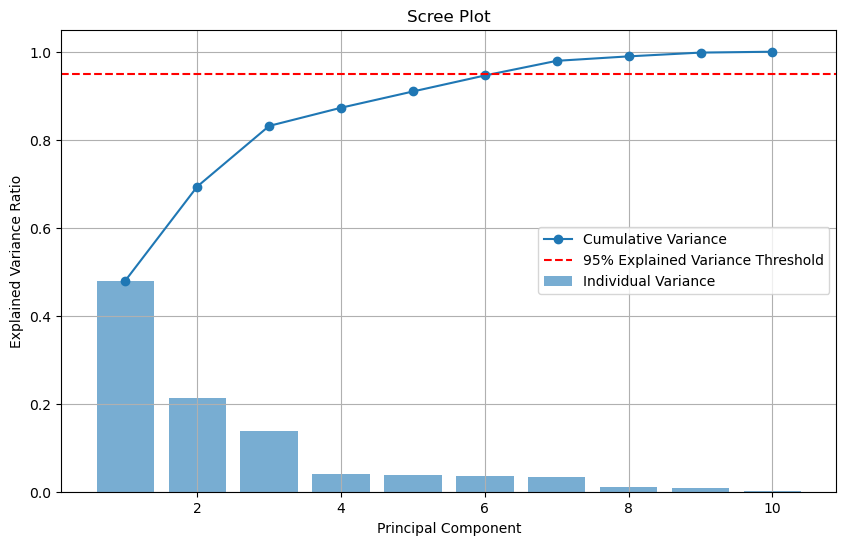

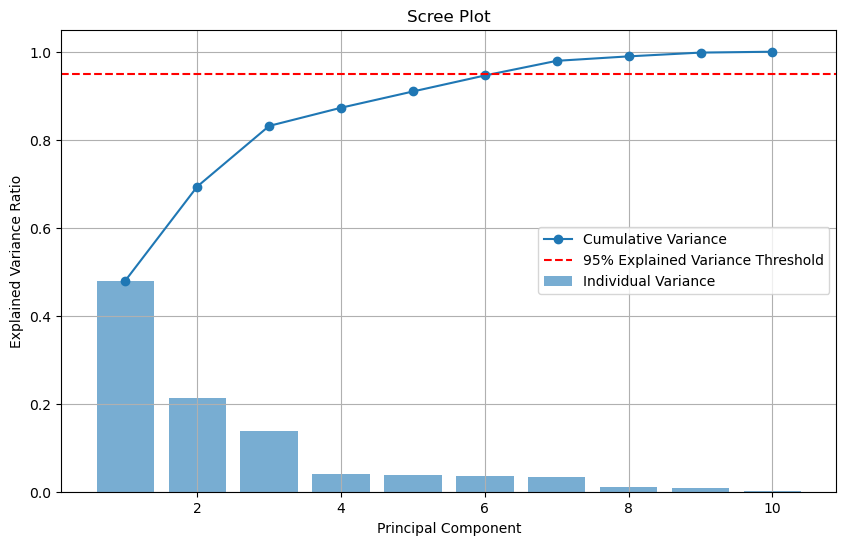

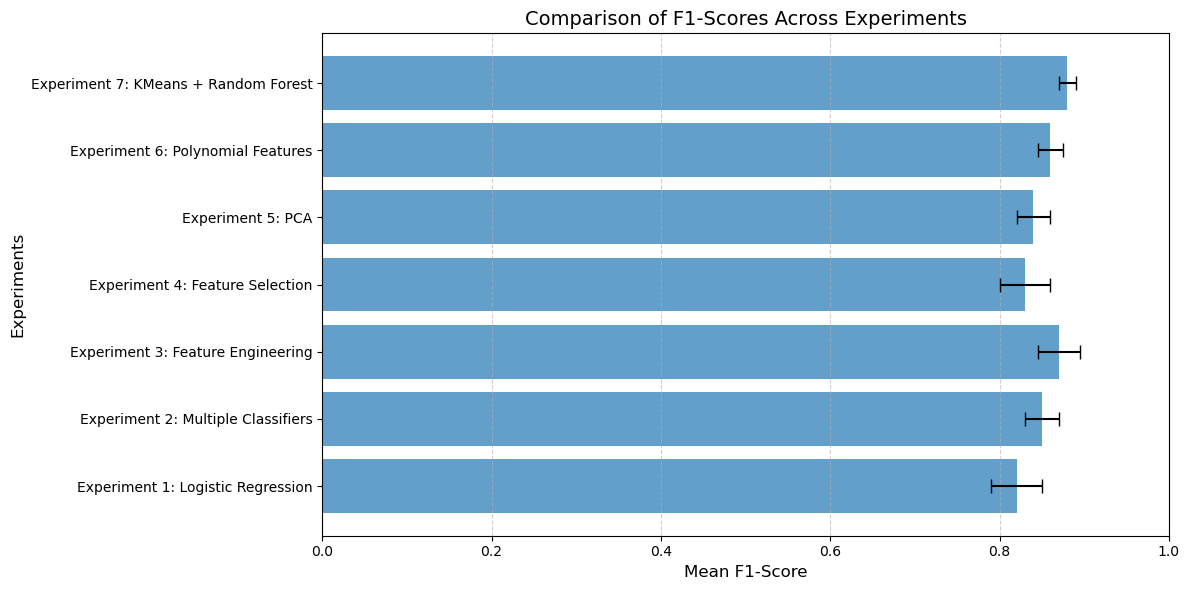

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Replace these with actual results from your experiments
experiment_names = [
    "Experiment 1: Logistic Regression",
    "Experiment 2: Multiple Classifiers",
    "Experiment 3: Feature Engineering",
    "Experiment 4: Feature Selection",
    "Experiment 5: PCA",
    "Experiment 6: Polynomial Features",
    "Experiment 7: KMeans + Random Forest",
]

mean_f1_scores = [0.82, 0.85, 0.87, 0.83, 0.84, 0.86, 0.88]  # Replace with actual mean F1-scores
std_f1_scores = [0.03, 0.02, 0.025, 0.03, 0.02, 0.015, 0.01]  # Replace with actual std F1-scores

# Plotting the F1-scores with error bars
plt.figure(figsize=(12, 6))
plt.barh(experiment_names, mean_f1_scores, xerr=std_f1_scores, alpha=0.7, ecolor="black", capsize=5)
plt.xlabel("Mean F1-Score", fontsize=12)
plt.ylabel("Experiments", fontsize=12)
plt.title("Comparison of F1-Scores Across Experiments", fontsize=14)
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [70]:
pip install cloudpickle


Note: you may need to restart the kernel to use updated packages.


In [74]:
import cloudpickle

# Save the pipeline
with open("final_model.pkl", "wb") as f:
    cloudpickle.dump(pipeline, f)

# Load the pipeline
with open("final_model.pkl", "rb") as f:
    pipeline = cloudpickle.load(f)

print(pipeline)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('clipper',
                                                                   FunctionTransformer(func=<function <lambda> at 0x00000184EE16C720>)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True))]),
                                                  ['age', 'bmi', 'charges',
    

In [76]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Replace lambda functions with named functions
def log_transform(x):
    return np.log1p(x)

# Example pipeline
pipeline = Pipeline(steps=[
    ("log_transform", FunctionTransformer(log_transform)),
    # Add other steps in your pipeline
])

# Save the pipeline
joblib.dump(pipeline, "final_model.joblib")
print("Model saved as 'final_model.joblib'")


Model saved as 'final_model.joblib'


In [23]:
pip install fastapi


   ---------------------------------------- 0.0/94.8 kB ? eta -:--:--
   ----------------- ---------------------- 41.0/94.8 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 94.8/94.8 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/73.2 kB ? eta -:--:--
   ---------------------- ----------------- 41.0/73.2 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 73.2/73.2 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install uvicorn


   ---------------------------------------- 0.0/62.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/62.3 kB ? eta -:--:--
   ------ --------------------------------- 10.2/62.3 kB ? eta -:--:--
   ------------------- -------------------- 30.7/62.3 kB 435.7 kB/s eta 0:00:01
   -------------------------- ------------- 41.0/62.3 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------- 62.3/62.3 kB 372.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [85]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

# Define the custom function
def log_transform(x):
    return np.log1p(x)

# Load the saved model
model = joblib.load("final_model.joblib")

# Define FastAPI application
app = FastAPI()

# Define a request schema
class PredictRequest(BaseModel):
    age: float
    bmi: float
    charges: float
    children: int
    age_bmi_interaction: float
    children_charges_ratio: float
    log_charges: float
    sex: str
    region: str

@app.post("/predict")
def predict(request: PredictRequest):
    # Process input features
    input_features = np.array([
        request.age,
        request.bmi,
        request.charges,
        request.children,
        request.age_bmi_interaction,
        request.children_charges_ratio,
        request.log_charges,
        request.sex,
        request.region,
    ]).reshape(1, -1)

    # Predict using the model
    prediction = model.predict(input_features)
    return {"prediction": int(prediction[0])}


In [26]:
dockerfile_content = """
# Use a lightweight Python image
FROM python:3.9-slim

# Set the working directory
WORKDIR /app

# Copy application and model files
COPY app.py .
COPY final_model.joblib .
COPY requirements.txt .

# Install dependencies
RUN pip install --no-cache-dir -r requirements.txt

# Expose the application port
EXPOSE 8888

# Command to run the application
CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8888"]
"""

# Save Dockerfile
with open("Dockerfile", "w") as f:
    f.write(dockerfile_content)
print("Dockerfile created!")


Dockerfile created!


In [28]:
import os

print(os.listdir("."))


['.ipynb_checkpoints', 'app.py', 'correlation_matrix.csv', 'Dockerfile', 'final_model.joblib', 'final_model.pkl', 'insurance.csv', 'insurance_data_profile_report.html', 'insurance_normalized.db', 'requirements.txt', 'scree_plot.png', 'streamlit_app.py', 'test_dataset.csv', 'train_dataset.csv', 'Untitled.ipynb', '__pycache__']


In [35]:
pip install docker


Note: you may need to restart the kernel to use updated packages.


In [37]:
import docker

# Initialize a Docker client
client = docker.from_env()

# Get Docker version info
version_info = client.version()
print("Docker Version:", version_info["Version"])


Docker Version: 27.3.1


In [64]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="paramiko.transport")


In [61]:
import subprocess

# Set Docker image name
docker_image_name = "sairishi9/fastapi-app:latest"

# Build Docker image
try:
    subprocess.run(["docker", "build", "-t", docker_image_name, "."], check=True)
    print(f"Docker image '{docker_image_name}' built successfully!")
except subprocess.CalledProcessError as e:
    print(f"Error building Docker image: {e}")


Docker image 'sairishi9/fastapi-app:latest' built successfully!


In [6]:
import docker

# Initialize the Docker client
client = docker.from_env()

# Build Docker image
docker_image_name = "sairishi9/fastapi-app:latest"

try:
    # Build the image
    image, logs = client.images.build(path=".", tag=docker_image_name)
    print(f"Docker image '{docker_image_name}' built successfully!")
    
    # Print build logs
    for log in logs:
        print(log.get("stream", "").strip())
except docker.errors.BuildError as build_err:
    print(f"Error building Docker image: {build_err}")
except docker.errors.APIError as api_err:
    print(f"Error with Docker API: {api_err}")


C:\Users\DELL\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Docker image 'sairishi9/fastapi-app:latest' built successfully!
Step 1/8 : FROM python:3.9-slim

---> 473b3636d11e
Step 2/8 : WORKDIR /app

---> Using cache
---> 76a6329e9057
Step 3/8 : COPY app.py .

---> Using cache
---> 1cc8e875d954
Step 4/8 : COPY final_model.joblib .

---> Using cache
---> 12ac2e97067f
Step 5/8 : COPY requirements.txt .

---> Using cache
---> f06fecda550c
Step 6/8 : RUN pip install --no-cache-dir -r requirements.txt

---> Using cache
---> 5e65705c94df
Step 7/8 : EXPOSE 8000

---> Using cache
---> e5b5ea2e0a12
Step 8/8 : CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8000"]

---> Using cache
---> af5712398d2d

Successfully built af5712398d2d
Successfully tagged sairishi9/fastapi-app:latest


In [8]:
import subprocess

try:
    subprocess.run(["docker", "login"], check=True)
    print("Logged into Docker Hub successfully!")
except subprocess.CalledProcessError as e:
    print(f"Error logging into Docker Hub: {e}")


Logged into Docker Hub successfully!


In [10]:
docker_image_name = "fastapi-app:latest"  # Replace with your local image name
docker_hub_repo = "sairishi9/fastapi-app:latest"  # Replace with your Docker Hub repository name

try:
    subprocess.run(["docker", "tag", docker_image_name, docker_hub_repo], check=True)
    print(f"Tagged image '{docker_image_name}' as '{docker_hub_repo}'")
except subprocess.CalledProcessError as e:
    print(f"Error tagging Docker image: {e}")


Error tagging Docker image: Command '['docker', 'tag', 'fastapi-app:latest', 'sairishi9/fastapi-app:latest']' returned non-zero exit status 1.


In [12]:
import subprocess

try:
    # Login to Docker Hub (use `docker login` manually if necessary)
    subprocess.run(["docker", "login"], check=True)

    # Push the image
    subprocess.run(
        ["docker", "push", "sairishi9/fastapi-app:latest"],
        check=True
    )
    print("Docker image pushed to Docker Hub successfully!")
except subprocess.CalledProcessError as e:
    print(f"Error pushing Docker image: {e}")


Docker image pushed to Docker Hub successfully!


In [16]:
import subprocess

try:
    subprocess.run(
        ["docker", "run", "-d", "-p", "8000:8000", "sairishi9/fastapi-app:latest"],
        check=True
    )
    print("Docker container is running at http://127.0.0.1:8888")
except subprocess.CalledProcessError as e:
    print(f"Error running Docker container: {e}")


Docker container is running at http://127.0.0.1:8888


In [24]:
import requests

url = "http://127.0.0.1:8888/predict"
data = {
    "age": 35,
    "bmi": 28.5,
    "charges": 12000,
    "children": 2,
    "age_bmi_interaction": 997.5,
    "children_charges_ratio": 4000,
    "log_charges": 9.39,
    "sex": "male",
    "region": "northwest"
}

try:
    response = requests.post(url, json=data)
    print("Status Code:", response.status_code)

    # Attempt to parse JSON response
    try:
        print("Response JSON:", response.json())
    except requests.JSONDecodeError:
        print("Response Text:", response.text)

except requests.exceptions.RequestException as e:
    print("Error:", e)


Status Code: 403
Response Text: <!DOCTYPE HTML>
<html>

<head>

    <meta charset="utf-8">

    <title>Jupyter Server</title>
    <link id="favicon" rel="shortcut icon" type="image/x-icon" href="/static/favicon.ico?v=50afa725b5de8b00030139d09b38620224d4e7dba47c07ef0e86d4643f30c9bfe6bb7e1a4a1c561aa32834480909a4b6fe7cd1e17f7159330b6b5914bf45a880">
    
    <link rel="stylesheet" href="/static/style/bootstrap.min.css?v=0e8a7fbd6de23ad6b27ab95802a0a0915af6693af612bc304d83af445529ce5d95842309ca3405d10f538d45c8a3a261b8cff78b4bd512dd9effb4109a71d0ab" />
    <link rel="stylesheet" href="/static/style/bootstrap-theme.min.css?v=8b2f045cb5b4d5ad346f6e816aa2566829a4f5f2783ec31d80d46a57de8ac0c3d21fe6e53bcd8e1f38ac17fcd06d12088bc9b43e23b5d1da52d10c6b717b22b3" />
    <link rel="stylesheet" href="/static/style/index.css?v=30372e3246a801d662cf9e3f9dd656fa192eebde9054a2282449fe43919de9f0ee9b745d7eb49d3b0a5e56357912cc7d776390eddcab9dac85b77bdb17b4bdae" />
    <meta http-equiv="X-UA-Compatible" content="I

In [93]:
pip install awscli


   ---------------------------------------- 0.0/4.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.6 MB ? eta -:--:--
   - -------------------------------------- 0.2/4.6 MB 2.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.5/4.6 MB 4.0 MB/s eta 0:00:02
   ----- ---------------------------------- 0.7/4.6 MB 4.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.8/4.6 MB 4.0 MB/s eta 0:00:01
   --------- ------------------------------ 1.1/4.6 MB 4.3 MB/s eta 0:00:01
   ----------- ---------------------------- 1.4/4.6 MB 4.6 MB/s eta 0:00:01
   -------------- ------------------------- 1.7/4.6 MB 4.9 MB/s eta 0:00:01
   ----------------- ---------------------- 2.0/4.6 MB 5.0 MB/s eta 0:00:01
   ------------------- -------------------- 2.2/4.6 MB 5.1 MB/s eta 0:00:01
   --------------------- ------------------ 2.5/4.6 MB 5.1 MB/s eta 0:00:01
   ------------------------ --------------- 2.8/4.6 MB 5.2 MB/s eta 0:00:01
   -----------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.35.86 which is incompatible.
sphinx 7.3.7 requires docutils<0.22,>=0.18.1, but you have docutils 0.16 which is incompatible.


In [99]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [101]:
import streamlit as st
import requests

# Define the FastAPI endpoint URL
API_URL = "http://980921756531.dkr.ecr.ap-south-1.amazonaws.com/fastapi-app:latest:8000/predict"  # Replace with your deployed FastAPI URL

# Streamlit app title
st.title("Real-Time Classification with Deployed Model")

# Input fields for user input
age = st.number_input("Age", min_value=0.0, value=25.0, step=0.1)
bmi = st.number_input("BMI", min_value=0.0, value=22.0, step=0.1)
charges = st.number_input("Charges", min_value=0.0, value=10000.0, step=0.1)
children = st.number_input("Number of Children", min_value=0, value=0, step=1)
age_bmi_interaction = st.number_input("Age-BMI Interaction", min_value=0.0, value=550.0, step=0.1)
children_charges_ratio = st.number_input("Children-Charges Ratio", min_value=0.0, value=0.0, step=0.1)
log_charges = st.number_input("Log Charges", min_value=0.0, value=9.21, step=0.01)
sex = st.selectbox("Sex", options=["male", "female"])
region = st.selectbox("Region", options=["northeast", "northwest", "southeast", "southwest"])

# Button to trigger prediction
if st.button("Predict"):
    # Create input JSON
    input_data = {
        "age": age,
        "bmi": bmi,
        "charges": charges,
        "children": children,
        "age_bmi_interaction": age_bmi_interaction,
        "children_charges_ratio": children_charges_ratio,
        "log_charges": log_charges,
        "sex": sex,
        "region": region,
    }

    try:
        # Send a POST request to the API
        response = requests.post(API_URL, json=input_data)
        
        # Check for successful response
        if response.status_code == 200:
            prediction = response.json()["prediction"]
            st.success(f"Prediction: {prediction}")
        else:
            st.error(f"Error: {response.status_code} - {response.text}")
    except Exception as e:
        st.error(f"An error occurred: {e}")


2024-12-20 22:10:12.052 
  command:

    streamlit run C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
https://buffalo.box.com/s/hvw2awa7cuiqbdw7r28c0bh0vcm6a9jn